## Observations and Insights 

In [154]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combined_data_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [42]:
# Checking the number of mice.
total_mice = len(combined_data_df["Mouse ID"].unique())
print("Total number of mice: " + str(total_mice))

Total number of mice: 249


In [43]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [44]:
# Optional: Get all the data for the duplicate mouse ID. 



In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [46]:
# Checking the number of mice in the clean DataFrame.
new_mice_total = len(clean_data_df['Mouse ID'].unique())
new_mice_total

249

## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regi_mean = clean_data_df.groupby('Drug Regimen').mean()
regimean = regi_mean['Tumor Volume (mm3)']
regimean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [48]:
regi_median = clean_data_df.groupby('Drug Regimen').median()
regimedian = regi_median['Tumor Volume (mm3)']
regimedian

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [49]:
regi_var = clean_data_df.groupby('Drug Regimen').var()
regivar = regi_var['Tumor Volume (mm3)']
regivar

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [50]:
regi_sd = clean_data_df.groupby('Drug Regimen').std()
regisd = regi_sd['Tumor Volume (mm3)']
regisd

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [51]:
regi_sem = clean_data_df.groupby('Drug Regimen').sem()
regisem = regi_sem['Tumor Volume (mm3)']
regisem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [52]:
# Assemble the resulting series into a single summary dataframe.
describe_summary_df = pd.DataFrame({
    'Tumor Volume Mean': regimean,
    'Tumor Volume Median': regimedian,
    'Tumor Volume Variance': regivar,
    'Tumor Volume Standard Deviation': regisd,
    'Tumor Volume SEM': regisem
})
describe_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [53]:
# Using the aggregation method, produce the same summary statistics in a single line
aggmean = describe_summary_df['Tumor Volume Mean'].agg('sum')
aggmean

509.8323552674331

In [54]:
aggmedian = describe_summary_df['Tumor Volume Median'].agg('sum')
aggmedian

499.484928375

In [55]:
aggvar = describe_summary_df['Tumor Volume Variance'].agg('sum')
aggvar

477.87118907152603

In [56]:
aggsd = describe_summary_df['Tumor Volume Standard Deviation'].agg('sum')
aggsd

68.15695387954615

In [57]:
aggsem = describe_summary_df['Tumor Volume SEM'].agg('sum')
aggsem

5.009383363785215

In [58]:
aggsum_df = pd.DataFrame({
    'Tumor Volume Mean': aggmean,
    'Tumor Volume Median': aggmedian,
    'Tumor Volume Variance': aggvar,
    'Tumor Volume Standard Deviation': aggsd,
    'Tumor Volume SEM': aggsem
}, index=[0])
aggsum_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
0,509.832355,499.484928,477.871189,68.156954,5.009383


## Bar and Pie Charts

In [59]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_per_regi = clean_data_df.groupby('Drug Regimen').count().reset_index()
mice_perdrug = mice_per_regi[['Drug Regimen', 'Mouse ID']]
mice_perdrug = mice_perdrug.set_index('Drug Regimen')
mice_perdrug

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


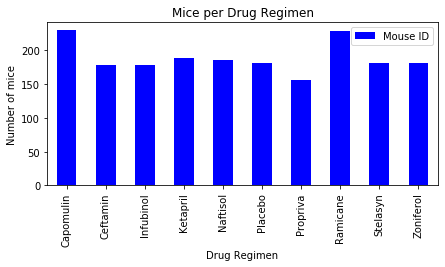

<Figure size 432x288 with 0 Axes>

In [124]:
# Use DataFrame.plot() in order to create a bar chart of the data
mice_perdrug.plot(kind="bar", color='b', figsize=(7,3))

# Set a title for the chart
plt.title("Mice per Drug Regimen")
plt.ylabel("Number of mice")

plt.show()
plt.tight_layout()

In [79]:
mice_per_regi2 = clean_data_df.groupby('Drug Regimen').count().reset_index()
mice_perdrug2 = mice_per_regi[['Drug Regimen', 'Mouse ID']]
mice_perdrug2

,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


In [74]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# Set x axis and tick locations
x_axis = np.arange(len(mice_perdrug))
tick_locations = [value for value in x_axis]
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

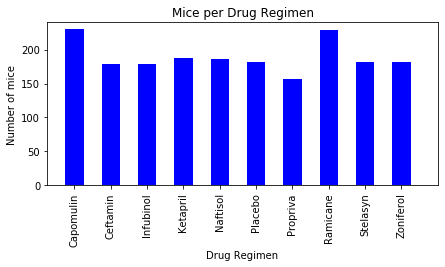

<Figure size 432x288 with 0 Axes>

In [123]:
# Create a list indicating where to write x labels
plt.figure(figsize=(7,3))
plt.bar(x_axis, mice_perdrug2["Mouse ID"], color='b', alpha=1, width=.5, align="center")
plt.xticks(tick_locations, mice_perdrug2["Drug Regimen"], rotation="vertical")

# Set a title for the chart
plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(mice_perdrug["Mouse ID"])+10)

plt.show()
plt.tight_layout()

In [131]:
#Modify data to only list one entry per mouse
all_mice = combined_data_df.drop_duplicates(subset='Mouse ID', keep='first')
male_female = all_mice['Sex'].value_counts()
male_female

Male      125
Female    124
Name: Sex, dtype: int64

In [133]:
male_female_df = pd.DataFrame({
    "Number of mice per Gender": male_female
})
male_female_df

,Number of mice per Gender
Male,125
Female,124


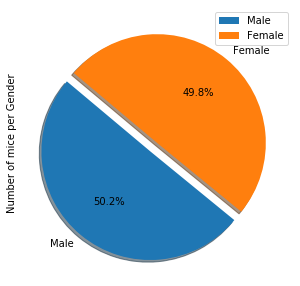

In [140]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Modify data to only list one entry per mouse
male_female_df.plot.pie(y='Number of mice per Gender', startangle=140, figsize=(5, 5), shadow=True, explode=explode, autopct="%1.1f%%", )

Male      125
Female    124
Name: Sex, dtype: int64

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [125, 124]

# The colors of each section of the pie chart
colors = ["blue", "pink"]

# Tells matplotlib to seperate the "Male mice" from "Female mice" section from the others
explode = (0.1, 0)

(-1.1762367126898932,
 1.1254463310846248,
 -1.190308764526366,
 1.124996700756096)

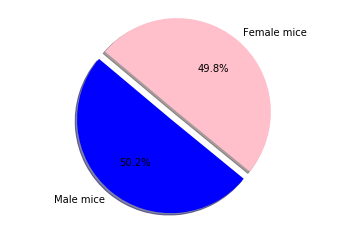

In [142]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [176]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tum_siz = clean_data_df.groupby('Mouse ID').max()
four_regi = tum_siz.loc[(tum_siz["Drug Regimen"] == "Capomulin") | (
    tum_siz["Drug Regimen"] == "Ramicane") | (tum_siz["Drug Regimen"] == "Infubinol") | (tum_siz["Drug Regimen"] == "Ceftamin"), :]
four_regi

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,45.466677,1
a444,Ramicane,Female,10,25,45,45.000000,0
...,...,...,...,...,...,...,...
y769,Ceftamin,Female,6,27,45,68.594745,4
y793,Capomulin,Male,17,17,45,45.000000,2
y865,Ceftamin,Male,23,26,45,64.729837,3


In [167]:
#Extract Drug Regimen, Timepoint, and Tumor Volume (mm3) columns
last_size = four_regi[['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

#Sort Columns to match Drug Regimens in the order they were given
last_size['Drug Regimen'] = pd.Categorical(last_size['Drug Regimen'], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
sorted_last_size = last_size.sort_values("Drug Regimen")
sorted_last_size

/Users/alfonsocamero/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
l897,Capomulin,45,46.154737
g288,Capomulin,45,46.304003
g316,Capomulin,45,46.809225
i557,Capomulin,45,47.685963
i738,Capomulin,45,45.595685
...,...,...,...
l733,Ceftamin,45,64.299830
o287,Ceftamin,45,59.741901
q483,Ceftamin,40,64.192341


In [173]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = []
for regimen in clean_data_df["Drug Regimen"]:
    if regimen not in treatment_list:
        treatment_list.append(regimen)
    
treatment_list

['Ramicane',
 'Capomulin',
 'Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ketapril',
 'Propriva',
 'Naftisol']

In [229]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

#Append last tumor size for each mouse across four regimens of interest
grouped = clean_data_df.groupby('Mouse ID').max().reset_index()
regi_plot = grouped.loc[(grouped["Drug Regimen"] == "Stelasyn") | (
    grouped["Drug Regimen"] == "Zoniferol") | (grouped["Drug Regimen"] == "Propriva") | (grouped["Drug Regimen"] == "Ketapril"), :]
regi_plot

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
4,a366,Stelasyn,Female,16,29,30,63.440686,1
5,a401,Zoniferol,Female,8,25,45,66.794156,4
8,a457,Ketapril,Female,11,30,10,49.783419,0
9,a492,Stelasyn,Male,20,25,45,60.122011,1
14,a699,Propriva,Female,5,28,45,62.191414,1
...,...,...,...,...,...,...,...,...
228,x402,Stelasyn,Male,21,28,45,61.619606,3
230,x613,Zoniferol,Female,2,29,15,48.077646,0
235,y260,Ketapril,Female,7,25,45,62.909441,4
243,z314,Stelasyn,Female,21,28,5,45.934712,0


In [230]:
#Sort Drug Regimens column by drug
regi_plot['Drug Regimen'] = pd.Categorical(regi_plot['Drug Regimen'], ["Stelasyn", "Zoniferol", "Propriva", "Ketapril"])
sorted_regi_plot = regi_plot.sort_values("Drug Regimen")
sorted_regi_plot

/Users/alfonsocamero/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
4,a366,Stelasyn,Female,16,29,30,63.440686,1
93,j984,Stelasyn,Female,2,30,45,70.653832,1
71,g867,Stelasyn,Female,9,25,15,51.060419,1
99,k510,Stelasyn,Female,8,27,20,52.105574,1
103,k862,Stelasyn,Female,13,25,45,69.299149,4
...,...,...,...,...,...,...,...,...
153,q119,Ketapril,Male,17,30,10,51.236606,0
46,d474,Ketapril,Male,18,27,40,60.233733,1
55,f278,Ketapril,Male,12,30,5,48.194578,0
60,f932,Ketapril,Male,15,29,0,45.000000,0


In [231]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Computing IQR
Q1 = sorted_regi_plot['Tumor Volume (mm3)'].quantile(0.25)
Q3 = sorted_regi_plot['Tumor Volume (mm3)'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1-1.5*IQR
UB = Q3+1.5*IQR
print(LB, UB)

24.100874552499995 94.28479613249999


In [245]:
# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_volume_list = sorted_regi_plot['Tumor Volume (mm3)']
tumor_volume_list

dtype('float64')

In [241]:
# add subset 
sample1 = tumor_volume_list.sample(25)
sample1.head()

65     68.163195
34     61.840058
44     47.474645
129    46.099100
180    46.602269
Name: Tumor Volume (mm3), dtype: float64

In [242]:
# Determine outliers using upper and lower bounds
outliers = [x for x in regi_plot if x <= LB or x >= UB]

TypeError: '>=' not supported between instances of 'numpy.ndarray' and 'str'

In [66]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [67]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [68]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [69]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
